In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv("data/cleaned_data.csv")
df = pd.DataFrame(data)
df.head()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
1,5,Rent,1168386.0,7 years,0.0,12.0,14.6,366784.0,0.0,0.0,other,Long Term,337304.0,165680.0,18692.0,731.0,1
2,7,Rent,1040060.0,10+ years,0.0,13.0,12.0,330374.0,0.0,0.0,other,Short Term,250888.0,89015.0,19761.0,705.0,1
3,9,Home Mortgage,1168386.0,1 year,0.0,10.0,24.6,511302.0,0.0,0.0,debt consolidation,Long Term,572880.0,205333.0,17613.0,731.0,1
4,10,Home Mortgage,1168386.0,< 1 year,0.0,7.0,11.5,256322.0,0.0,0.0,debt consolidation,Short Term,220858.0,187492.0,14592.0,731.0,0


In [ ]:
1️⃣ 類別型變數的 EDA

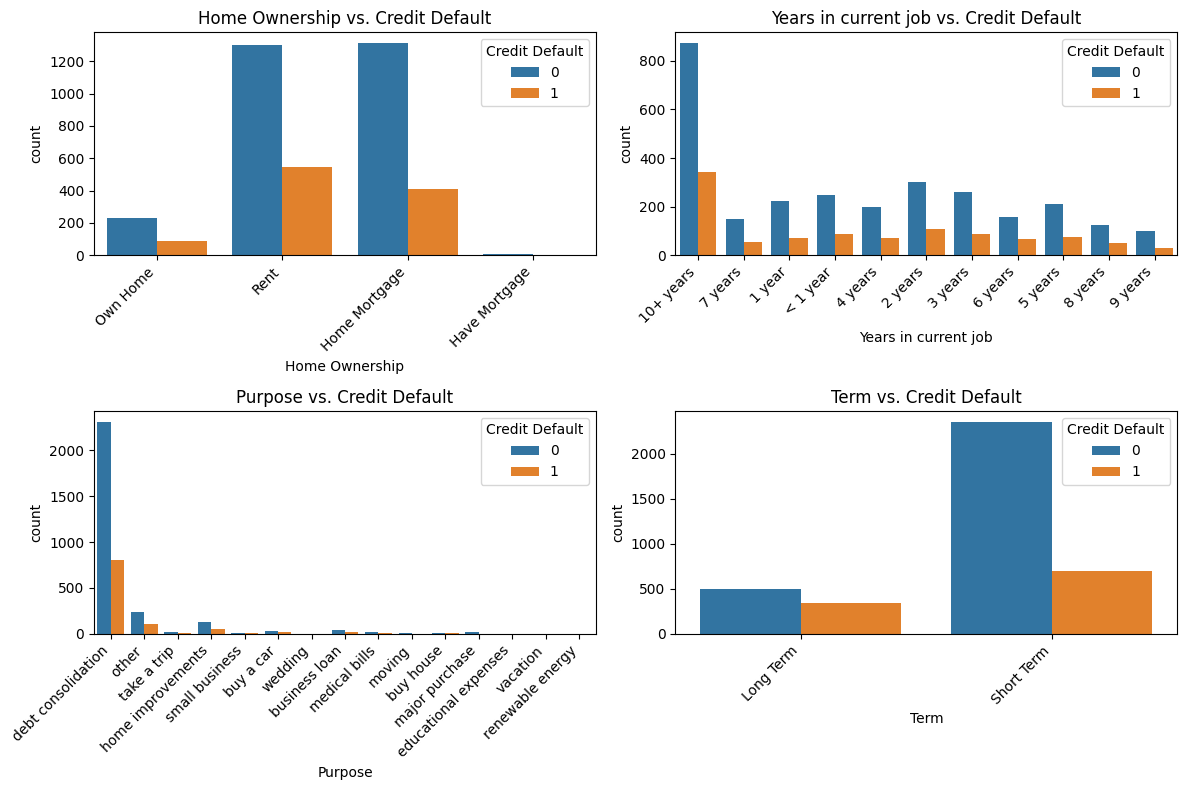

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = ['Home Ownership', 'Years in current job', 'Purpose', 'Term']

plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, hue="Credit Default", data=df)
    plt.xticks(rotation=45, ha="right")
    plt.title(f"{col} vs. Credit Default")
plt.tight_layout()
plt.show()


C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\gn012\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


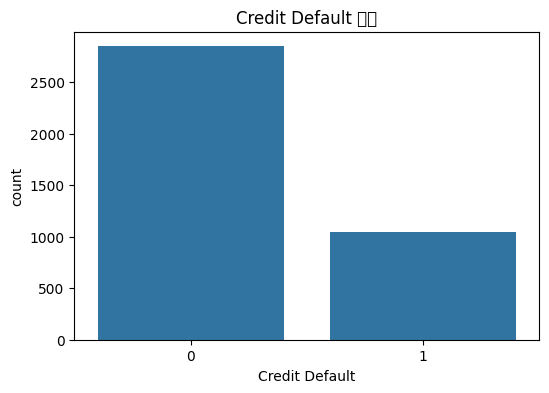

Credit Default
0    0.731451
1    0.268549
Name: proportion, dtype: float64


In [6]:

plt.figure(figsize=(6, 4))
sns.countplot(x='Credit Default', data=df)
plt.title("Credit Default 分佈")
plt.show()

# 計算正負樣本比例
print(df['Credit Default'].value_counts(normalize=True))


In [9]:
# 確認數據類型
print(df.dtypes[df.dtypes == 'object'])
print(df.dtypes[df.dtypes == 'category'])
print(df[['Home Ownership', 'Years in current job', 'Purpose', 'Term']].nunique())


Home Ownership          object
Years in current job    object
Purpose                 object
Term                    object
dtype: object
Series([], dtype: object)
Home Ownership           4
Years in current job    11
Purpose                 15
Term                     2
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Term']  # 只對有「固定類別數量」的變數使用 Label Encoding

label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # 存下轉換器，未來可以解碼


In [10]:
from sklearn.preprocessing import LabelEncoder

# 找出所有 object 型欄位
cat_cols = ['Home Ownership', 'Purpose', 'Years in current job', 'Term']

# 建立 LabelEncoder 字典（方便未來解碼）
label_encoders = {}

# 對每個類別型變數進行 Label Encoding
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # 轉換成數值
    label_encoders[col] = le  # 存下轉換器，未來可以解碼

# 確認轉換後的數據型態
print(df.dtypes)


Id                             int64
Home Ownership                 int32
Annual Income                float64
Years in current job           int32
Tax Liens                    float64
Number of Open Accounts      float64
Years of Credit History      float64
Maximum Open Credit          float64
Number of Credit Problems    float64
Bankruptcies                 float64
Purpose                        int32
Term                           int32
Current Loan Amount          float64
Current Credit Balance       float64
Monthly Debt                 float64
Credit Score                 float64
Credit Default                 int64
dtype: object


In [ ]:
1️⃣ 創造衍生變數（Derived Features）

In [16]:
# 債務收入比（Debt-to-Income, DTI）
df['Debt-to-Income'] = df['Monthly Debt'] / (df['Annual Income'] / 12)

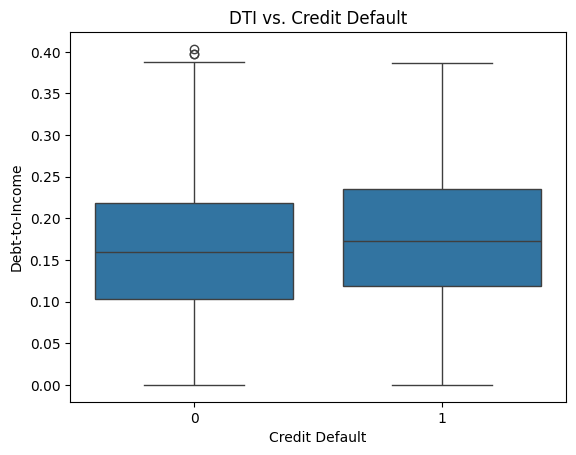

In [18]:

sns.boxplot(x='Credit Default', y='Debt-to-Income', data=df)
plt.title("DTI vs. Credit Default")
plt.show()


In [17]:
# 信用使用率（Credit Utilization Ratio）
df['Credit Utilization'] = df['Current Credit Balance'] / df['Maximum Open Credit']

In [19]:
# 信用卡/貸款總數與違約關係
df['High Credit Activity'] = df['Number of Open Accounts'].apply(lambda x: 1 if x > 10 else 0)

In [21]:
# 檢查相關矩陣是否有 NaN
corr_matrix = df.corr()
print("是否有 NaN 值:", np.any(np.isnan(corr_matrix)))
print("哪些欄位導致 NaN:", corr_matrix.isnull().sum())

是否有 NaN 值: True
哪些欄位導致 NaN: Id                            3
Home Ownership                3
Annual Income                 3
Years in current job          3
Tax Liens                    20
Number of Open Accounts       3
Years of Credit History       3
Maximum Open Credit           3
Number of Credit Problems    20
Bankruptcies                 20
Purpose                       3
Term                          3
Current Loan Amount           3
Current Credit Balance        3
Monthly Debt                  3
Credit Score                  3
Credit Default                3
Debt-to-Income                3
Credit Utilization            3
High Credit Activity          3
dtype: int64


In [23]:
# 檢查 NaN 值的總數
print("NaN 總數:", df.isnull().sum().sum())

# 檢查哪些欄位仍有 NaN
print(df.isnull().sum())

NaN 總數: 36
Id                            0
Home Ownership                0
Annual Income                 0
Years in current job          0
Tax Liens                     0
Number of Open Accounts       0
Years of Credit History       0
Maximum Open Credit           0
Number of Credit Problems     0
Bankruptcies                  0
Purpose                       0
Term                          0
Current Loan Amount           0
Current Credit Balance        0
Monthly Debt                  0
Credit Score                  0
Credit Default                0
Debt-to-Income                0
Credit Utilization           36
High Credit Activity          0
dtype: int64


In [24]:
print("Maximum Open Credit = 0 的筆數:", (df['Maximum Open Credit'] == 0).sum())


Maximum Open Credit = 0 的筆數: 40


In [25]:
df['Credit Utilization'] = df.groupby('Credit Score')['Credit Utilization'].transform(lambda x: x.fillna(x.median()))


In [26]:
print("NaN 總數:", df.isnull().sum().sum())  # 確保為 0


NaN 總數: 0


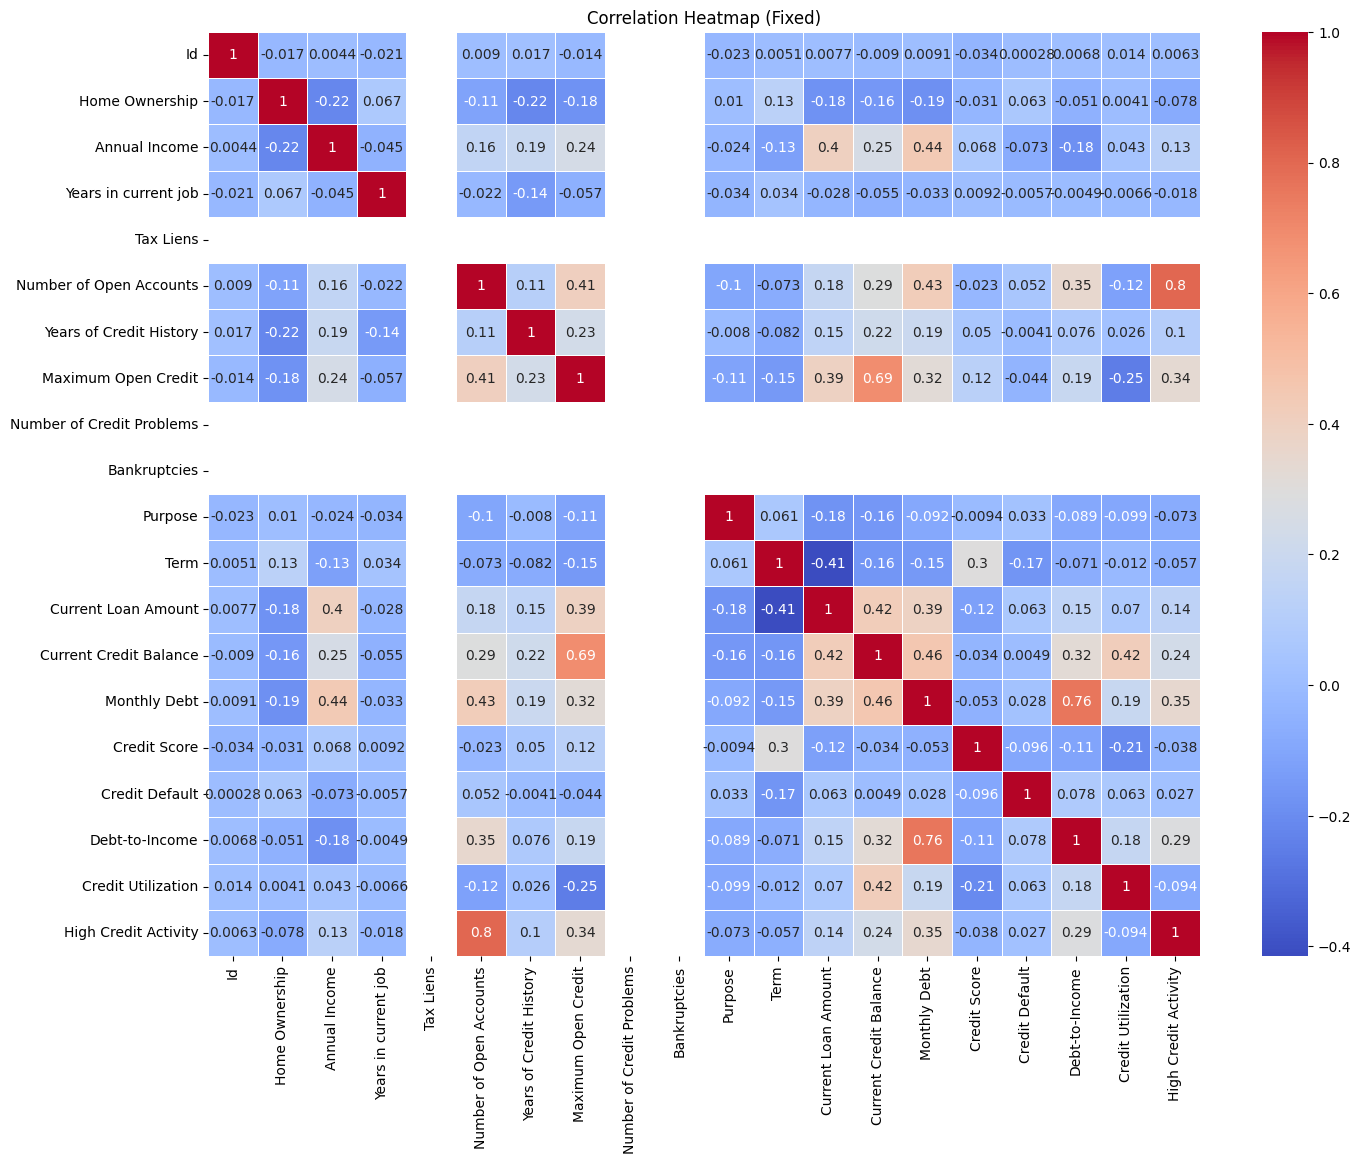

In [28]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap (Fixed)")
plt.show()

In [ ]:
# 儲存更新後的數據
df.to_csv("cleaned_labeled_data_with_features.csv", index=False)